<a href="https://colab.research.google.com/github/OweT1/titanicisfalling/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing of Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
np.random.seed(seed = 42)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!ls /content/drive/MyDrive/'Colab Datasets'/Titanic

test.csv  train.csv


# Reading in data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Titanic/train.csv")

# Data exploration

In [ ]:
print(df.head())
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

In [ ]:
print(df['Pclass'].unique())
print(df['SibSp'].unique())
print(df['Parch'].unique())
# print(df['Ticket'].unique())
# print(df['Cabin'].unique())
print(df['Embarked'].unique())

[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [ ]:
print(df['Embarked'].value_counts())
print(df.isna().sum())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Splitting of Data
We will drop the non-relevant data, such as the `PassengerId`, `Name`, `Cabin` and `Ticket`. These are dropped as they will not be useful to our models.

In [ ]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis = 1)
y = df[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

# Imputing Values
After splitting the data, we will impute the missing data seperately. For this case, we will only need to impute for our `Age` & `Embarked` columns. We will do so by employing the mean and most_frequent strategies to impute the missing data.


In [ ]:
print(X_train.isna().sum())
print(X_test.isna().sum())

Pclass        0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         40
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [ ]:
print(X_train[pd.isna(X_train['Embarked'])])

     Pclass     Sex   Age  SibSp  Parch  Fare Embarked
562       1  female  62.0      0      0  80.0      NaN
595       1  female  38.0      0      0  80.0      NaN


In [ ]:
age_imputer = SimpleImputer(strategy = 'mean')
X_train['Age'] = age_imputer.fit_transform(X_train[['Age']])
X_test['Age'] = age_imputer.transform(X_test[['Age']])

# Imputing of 'Embarked' column (Which does not work)
# embarked_imputer = SimpleImputer(strategy = 'most_frequent')
# X_train['Embarked'] = embarked_imputer.fit_transform(X_train[['Embarked']])
# X_test['Embarked'] = embarked_imputer.transform(X_test[['Embarked']])

X_train['Embarked'].fillna("C", inplace = True)
X_test['Embarked'].fillna("C", inplace = True)

# Check that Age & Embarked values are imputed
print(X_train.isna().sum())
print(X_test.isna().sum())
print(X_train.shape)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(712, 7)


# One Hot Encoding
Our categorical variables are `Sex` and `Embarked`. We will perform One Hot Encoding on these columns to make them usable by machine learning models.

In [ ]:
categorical_var = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

encoder = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown = 'infrequent_if_exist')

X_train_one_hot_encoded = encoder.fit_transform(X_train[categorical_var])
X_train_one_hot_df = pd.DataFrame(X_train_one_hot_encoded, columns = encoder.get_feature_names_out(categorical_var))

X_train = pd.concat([X_train, X_train_one_hot_df], axis = 1)
X_train = X_train.drop(categorical_var, axis = 1)

X_test_one_hot_encoded = encoder.transform(X_test[categorical_var])
X_test_one_hot_df = pd.DataFrame(X_test_one_hot_encoded, columns = encoder.get_feature_names_out(categorical_var))

X_test = pd.concat([X_test, X_test_one_hot_df], axis = 1)
X_test = X_test.drop(categorical_var, axis = 1)

In [ ]:
# encoded_df = pd.get_dummies(X_train, columns = categorical_var, drop_first = True, dtype = int)
# print(encoded_df)

# Scaling of values
We will need to scale the ordinal columns of our dataframe before we proceed to fit it into our model. We will use a Standard Scaler for this.

In [ ]:
scaler = StandardScaler()
# scaler = MinMaxScaler() - Produced worse results

ord_var = ['Age', 'Fare']

new_ord_var_train = pd.DataFrame(scaler.fit_transform(X_train[ord_var]), columns = ord_var)
X_train = X_train.drop(ord_var, axis = 1)
X_train = pd.concat([X_train, new_ord_var_train], axis = 1)

new_ord_var_test = pd.DataFrame(scaler.transform(X_test[ord_var]), columns = ord_var)
X_test = X_test.drop(ord_var, axis = 1)
X_test = pd.concat([X_test, new_ord_var_test], axis = 1)

# Correlations between features and target

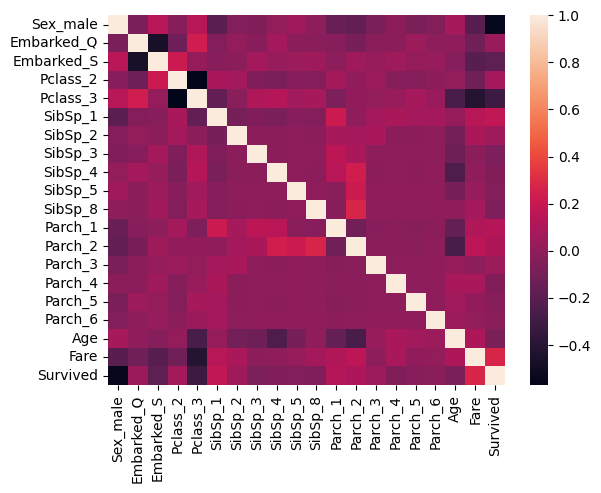

            Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3   SibSp_1  \
Sex_male    1.000000   -0.081956    0.146864 -0.033818  0.135271 -0.200197   
Embarked_Q -0.081956    1.000000   -0.469457 -0.123677  0.230440 -0.045835   
Embarked_S  0.146864   -0.469457    1.000000  0.210451  0.016651 -0.036250   
Pclass_2   -0.033818   -0.123677    0.210451  1.000000 -0.570182  0.085477   
Pclass_3    0.135271    0.230440    0.016651 -0.570182  1.000000 -0.168012   
SibSp_1    -0.200197   -0.045835   -0.036250  0.085477 -0.168012  1.000000   
SibSp_2    -0.044019    0.011747   -0.022658  0.072794 -0.025564 -0.095368   
SibSp_3    -0.061012   -0.034533    0.073559 -0.061661  0.108142 -0.065292   
SibSp_4     0.006744    0.067449    0.024725 -0.075789  0.132921 -0.080253   
SibSp_5     0.048294   -0.018821    0.040090 -0.033606  0.058939 -0.035585   
SibSp_8    -0.007848   -0.024332    0.051830 -0.043446  0.076197 -0.046005   
Parch_1    -0.143886   -0.035140   -0.010437  0.063047 -0.071883

In [ ]:
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr())
plt.show()
print(pd.concat([X_train, y_train], axis = 1).corr())

From the above correlation plot, we can see some strong correlations between:
1. `Sex_male` & `Survived` (Meaning if they were male, they were less likely to survive)
2. `PClass` & `Survived` (The higher their PClass, the lower their survival rates)
3. `PClass` & `Fare` (The higher the PClass, the lower the fare)
4. `PClass` & `Age` (The higher the age, the lower the PClass?)

These trends do make sense with the contextual knowledge we have: Usually in such disasters, they will give higher priority to rescuing women and children, hence men will have much lower survival rates as compared to women. Secondly, those with higher `PClass` may have lesser chances of survival since their class is considered worse, and so the prices of these tickets would be lower. Additionally, people who are older are more able to afford higher-price tickets, hence the correlation between `PClass` & `Age`.


In [ ]:
print(X_train.head())

   Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  SibSp_1  SibSp_2  \
0       1.0         0.0         1.0       0.0       1.0      0.0      0.0   
1       1.0         0.0         1.0       1.0       0.0      0.0      0.0   
2       1.0         0.0         1.0       0.0       0.0      0.0      0.0   
3       0.0         0.0         1.0       0.0       1.0      0.0      0.0   
4       0.0         0.0         1.0       1.0       0.0      1.0      0.0   

   SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_1  Parch_2  Parch_3  Parch_4  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

   Parch_5  Parch_6           Age      Fare  
0      0.0      0.0 -5.46322

# Prediction Models
After processing our data, we will now look to do some predictions using the processed data. We will try using the following models to predict the survival rates of the passengers:
1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. K Nearest Neighbors
5. AdaBoosting (Ensemble)
6. Random Forest (Ensemble)
7. Support Vector Machine
8. PCA & Logistic Regression
9. Majority Voting (Ensemble)
10. Stacking (Ensemble)


In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

print("Naive Bayes Accuracy: ", gnb.score(X_test, y_test))

Naive Bayes Accuracy:  0.40782122905027934


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
log = LogisticRegression()

log.fit(X_train, y_train)

print("Logistic Regression Accuracy: ", log.score(X_test, y_test))

Logistic Regression Accuracy:  0.7877094972067039


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dtr = DecisionTreeClassifier()

dtr.fit(X_train, y_train)

print("Decision Tree Accuracy: ", dtr.score(X_test, y_test))

Decision Tree Accuracy:  0.776536312849162


In [ ]:
knn = KNeighborsClassifier(n_jobs = -1)

knn.fit(X_train, y_train)

print("K Nearest Neighbors Accuracy: ", knn.score(X_test, y_test))

K Nearest Neighbors Accuracy:  0.8044692737430168


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, algorithm = "SAMME")

ada.fit(X_train, y_train)

print("AdaBoost Accuracy: ", ada.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Accuracy:  0.7821229050279329


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

rfc.fit(X_train, y_train)

print("Random Forest Accuracy: ", rfc.score(X_test, y_test))

<ipython-input-573-4afd847e962b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Random Forest Accuracy:  0.8212290502793296


In [ ]:
svm = SVC()

svm.fit(X_train, y_train)

print("Normal SVM Accuracy: " , svm.score(X_test, y_test))

lin_svm = LinearSVC()

lin_svm.fit(X_train, y_train)

print("Linear SVM Accuracy: " , lin_svm.score(X_test, y_test))

Normal SVM Accuracy:  0.8156424581005587
Linear SVM Accuracy:  0.8044692737430168


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
log_pca = LogisticRegression()
pca = PCA(n_components = 10)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

print("Variance of PCA Components: ", pca.explained_variance_ratio_)

log_pca.fit(X_train_pca, y_train)
print("PCA & Logistic Regression Accuracy: ", log_pca.score(X_test_pca, y_test))

# Alternatively, using a pipeline

pipe = Pipeline([('pca', pca), ('log', log_pca)])
pipe.fit(X_train_pca, y_train)
print("PCA & Logistic Regression Accuracy: ", accuracy_score(y_test, pipe.predict(X_test_pca)))


Variance of PCA Components: 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 [0.34935777 0.27755918 0.09590265 0.07310267 0.05329245 0.04707503
 0.03147711 0.01827083 0.01697853 0.01129436]
PCA & Logistic Regression Accuracy:  0.7932960893854749
PCA & Logistic Regression Accuracy:  0.7932960893854749


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
maj_vote = VotingClassifier(estimators = [('svm', svm), ('rfc', rfc), ('knn', knn), ('log_pca', log_pca), ('dt', dtr)], voting = 'hard')

maj_vote.fit(X_train, y_train)

print("Majority Voting Classifier Accuracy: ", maj_vote.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Majority Voting Classifier Accuracy:  0.8435754189944135


In [ ]:
stack = StackingClassifier(estimators = [('svm', svm), ('rfc', rfc), ('knn', knn), ('log_pca', log_pca), ('dt', dtr)], final_estimator = svm)

stack.fit(X_train, y_train)

print("Stacking Classifier Accuracy: ", stack.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Classifier Accuracy:  0.8156424581005587


# Conclusion & Results
When looking at the accuracy scores produced by the various techniques, the best model in this case would be the Majority Voting Classifier, which produced the highest prediction accuracy of 84.36% using our own test data.

In [ ]:
print("Naive Bayes Accuracy: ", gnb.score(X_test, y_test))
print("Logistic Regression Accuracy: ", log.score(X_test, y_test))
print("Decision Tree Accuracy: ", dtr.score(X_test, y_test))
print("K Nearest Neighbors Accuracy: ", knn.score(X_test, y_test))
print("AdaBoost Accuracy: ", ada.score(X_test, y_test))
print("Random Forest Accuracy: ", rfc.score(X_test, y_test))
print("Normal SVM Accuracy: " , svm.score(X_test, y_test))
print("Linear SVM Accuracy: " , lin_svm.score(X_test, y_test))
print("PCA & Logistic Regression Accuracy: ", log_pca.score(X_test_pca, y_test))
print("Majority Voting Classifier Accuracy: ", maj_vote.score(X_test, y_test))
print("Stacking Classifier Accuracy: ", stack.score(X_test, y_test))

Naive Bayes Accuracy:  0.40782122905027934
Logistic Regression Accuracy:  0.7877094972067039
Decision Tree Accuracy:  0.776536312849162
K Nearest Neighbors Accuracy:  0.8044692737430168
AdaBoost Accuracy:  0.7821229050279329
Random Forest Accuracy:  0.8212290502793296
Normal SVM Accuracy:  0.8156424581005587
Linear SVM Accuracy:  0.8044692737430168
PCA & Logistic Regression Accuracy:  0.7932960893854749
Majority Voting Classifier Accuracy:  0.8435754189944135
Stacking Classifier Accuracy:  0.8156424581005587


# Predicting
We will now use the data from `test.csv` to predict the values.

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Titanic/test.csv")

In [ ]:
test_X = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [ ]:
test_X['Age'] = age_imputer.transform(test_X[['Age']])
test_X['Embarked'].fillna("C", inplace = True)

In [ ]:
categorical_var = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

test_X_one_hot_encoded = encoder.transform(test_X[categorical_var])
test_X_one_hot_df = pd.DataFrame(test_X_one_hot_encoded, columns = encoder.get_feature_names_out(categorical_var))

test_X = pd.concat([test_X, test_X_one_hot_df], axis = 1)
test_X = test_X.drop(categorical_var, axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
ord_var = ['Age', 'Fare']

new_ord_var_test = pd.DataFrame(scaler.transform(test_X[ord_var]), columns = ord_var)
test_X = test_X.drop(ord_var, axis = 1)
test_X = pd.concat([test_X, new_ord_var_test], axis = 1)

In [ ]:
print(test_X.isna().sum())
test_X.dropna(inplace = True)

Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Age           0
Fare          1
dtype: int64


In [ ]:
print("Predictions are: ", maj_vote.predict(test_X))

Predictions are:  [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 1 0 0 1]
